## 판다스 (Pandas)

- 핵심객체는 DataFrame이다
- 데이타프레임은 2차원 데이터 구조체로 넘파이보다 편리하게 데이타 핸들링한다.
- R 언어의 데이타 프레임과 비슷하고 많이 사용된다


#### DataFrame 에서 데이타 필터링 ( 추출하기 )

0. 맨처음에는

    + df[2] : 2행의 데이타 추출
    + df['A'] : A열(컬럼) 데이타 추출
    
    + df[n:m] : n번째부터 m-1번째까지의 행 추출
        
        ` 행과 열을 섞어서 추출함.
        
        ` 판다스를 만든 사람이 쓴 책의 번역서를 보면 이 부분을 후회한다고 나옴
        
        ` df[2] 이 형식은 에러 발생 ( 2021.01)
      

1. 열(컬럼) 추출

    + df.컬럼명
    + df['컬럼명']
       
    
2. 행 추출

    + df.loc[] : 인덱스 지정하지 않으면 인덱스(순서), 인덱스 지정하면 인덱스로 추출
    + df.iloc[] : 인덱스(순서)로 추출


    [참고] 
    
    - 위 연산자는 노련한 개발자들도 혼동하기에, 일반적으로 하나만 선택해서 사용하는 것을 권장한단다
    - 넘파이와 유사한 부분으로 더우 혼동하기 쉽다
    - 판다스의 DataFrame와 Series에서도 다른이 있어서 주의해야 한다
    
    
3. 행과 열에서 추출
    
    + df.loc[2, 3] : 2 행의 3열 데이타
    + df.loc[1:3, 2:4] : 1부터 3행전까지의 행에서 2부터 4전까지의 열의 데이타

In [155]:
import pandas as pd

# 데이타 프레임 자료 생성
mydata = {
          'name':['홍길동','박길동','김길동'], 
          'age':[22,33,44], 
          'dept':['컴공','국어','산업']
         }
df = pd.DataFrame(mydata)
df


,name,age,dept
0,홍길동,22,컴공
1,박길동,33,국어
2,김길동,44,산업


In [54]:
df['name'] , df.name #컬럼(열) 추출 둘이 같음

(0    홍길동
 1    박길동
 2    김길동
 Name: name, dtype: object,
 0    홍길동
 1    박길동
 2    김길동
 Name: name, dtype: object)

In [55]:
df.loc[1], df.iloc[1]
df.loc[2,'dept']

'산업'

In [56]:
df2 = pd.DataFrame(mydata, index=['일','이','삼'])
df2.dept.iloc[2], df2.loc['삼']['dept'], df2.loc['삼']['dept'], df2.loc['삼','dept']

('산업', '산업', '산업', '산업')

### 컬럼 추가, 행 추가

In [57]:
# 컬럼 추가
df['gender'] = ['여','남','남']
df

,name,age,dept,gender
0,홍길동,22,컴공,여
1,박길동,33,국어,남
2,김길동,44,산업,남


In [58]:
# 행 추가
df.loc[3] = ['이길동', 55, '기계', '여']
df

,name,age,dept,gender
0,홍길동,22,컴공,여
1,박길동,33,국어,남
2,김길동,44,산업,남
3,이길동,55,기계,여


In [59]:
# 행 추가
df.loc[9] = ['최길동', 55, '기계', '여']
df

,name,age,dept,gender
0,홍길동,22,컴공,여
1,박길동,33,국어,남
2,김길동,44,산업,남
3,이길동,55,기계,여
9,최길동,55,기계,여


### 변경

In [72]:

# 인덱스순서를 변경하려면 -> 인덱스는 우선 DataFrame이 있는 상태에서 변경해야 한다
df = df.reindex(index=[0,2,1,3,9])
df

,name,age,dept,gender
0,홍길동,22,컴공,여
2,김길동,44,산업,남
1,박길동,33,국어,남
3,이길동,55,기계,여
9,최길동,55,기계,여


In [74]:
# 컬럼연산
df['age+10'] = df['age']+10
df

,name,age,dept,gender,age+10
0,홍길동,22,컴공,여,32
2,김길동,44,산업,남,54
1,박길동,33,국어,남,43
3,이길동,55,기계,여,65
9,최길동,55,기계,여,65


In [103]:
# 5 행에 'dept'열의 값을 '인문'으로 변경
df.loc[12,'dept'] = '인문6'
df.iloc[4,2] = '인문2'
df


,name,age,dept,gender,age+10
0,홍길동,22.0,컴공,여,32.0
2,김길동,44.0,산업,남,54.0
1,박길동,33.0,국어,남,43.0
3,이길동,55.0,기계,여,65.0
9,최길동,55.0,인문2,여,65.0
5,NaN,NaN,인문2,NaN,NaN
12,NaN,NaN,인문6,NaN,NaN


###  컬럼 속성 추출

In [105]:
# 컬럼 속성 추출
df['dept']
df.dept

0      컴공
2      산업
1      국어
3      기계
9     인문2
5     인문2
12    인문6
Name: dept, dtype: object

In [113]:
# 특정 컬럼의 특정행 추출 -> 즉 특정셀 추출 (2번 인덱스의 dept 컬럼값은? )

df.loc[2]['dept']
df.iloc[1]['dept']

df['dept'][2]
df.dept[2]

'산업'

In [116]:
# 30세 이상의 레코드 겁색
df[df['age'] >= 40]

,name,age,dept,gender,age+10
2,김길동,44.0,산업,남,54.0
3,이길동,55.0,기계,여,65.0
9,최길동,55.0,인문2,여,65.0


In [136]:
# 인덱스 1의 name 값을 '맹길동'로 변경하려면?
df.loc[1,'name'] = '맹길동'
df

,name,age,dept,gender,age+10
0,홍길동,22.0,컴공,여,32.0
2,김길동,44.0,산업,남,54.0
1,맹길동,33.0,국어,남,43.0
3,이길동,55.0,기계,여,65.0
9,최길동,55.0,인문2,여,65.0
5,NaN,NaN,인문2,NaN,NaN
12,NaN,NaN,인문6,NaN,NaN


## 데이타 필터링

- 넘파이와 유사한 부분으로 더우 혼동하기 쉽다

- 판다스의 DataFrame와 Series에서도 다른 부분이 있어서 주의해야 한다


1. loc[] : 인덱스와 명칭으로 추출

2. iloc[] : 인덱스로 추출

3. ix[] : 명치 기반 인덱싱과 위치 기반 인덱싱 모두 사용 (*  그러나 곧 사라질 예정 )


위 3 연산자는 노련한 개발자들도 혼동하기에,
일반적으로 하나만 선택해서 사용하는 것을 권장한단다


In [137]:
df
print ( df.loc[1])
print (df.iloc[1])

name       맹길동
age       33.0
dept        국어
gender       남
age+10    43.0
Name: 1, dtype: object
name       김길동
age       44.0
dept        산업
gender       남
age+10    54.0
Name: 2, dtype: object


In [140]:
# 명칭기반 인덱스 : 인덱스를 지정한 경우

df.loc[[9,2,1]]

,name,age,dept,gender,age+10
9,최길동,55.0,인문2,여,65.0
2,김길동,44.0,산업,남,54.0
1,맹길동,33.0,국어,남,43.0


In [141]:
# 특정 컬럼으로 인덱스를 지정
df[['name','dept']]

,name,dept
0,홍길동,컴공
2,김길동,산업
1,맹길동,국어
3,이길동,기계
9,최길동,인문2
5,NaN,인문2
12,NaN,인문6


In [144]:
df2 = df.set_index('name') #원본엔 적용안됨 #inplce = 'False' 원본적용X
df2

df.set_index('dept', inplace=True) #원본에 영향이 가기떄문에 사용 자제
df

,name,age,gender,age+10
dept,,,,
컴공,홍길동,22.0,여,32.0
산업,김길동,44.0,남,54.0
국어,맹길동,33.0,남,43.0
기계,이길동,55.0,여,65.0
인문2,최길동,55.0,여,65.0
인문2,NaN,NaN,NaN,NaN
인문6,NaN,NaN,NaN,NaN


### 정렬과 T

In [169]:
# 나이를 오름차순으로
#df.sort_index(ascending=False)   # 인덱스 정렬 기본값이 ascending=1
df.sort_values('age', ascending=False)

# 전문가들은 원본이 변경하지 않는 것을 권장

,name,age,dept
2,김길동,44,산업
1,박길동,33,국어
0,홍길동,22,컴공


In [171]:
df.T

,0,1,2
name,홍길동,박길동,김길동
age,22,33,44
dept,컴공,국어,산업


### 정보확인

In [173]:
# 총 데이터 건수와 데이타 타입등 정보 확인
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    3 non-null      object
 1   age     3 non-null      int64 
 2   dept    3 non-null      object
dtypes: int64(1), object(2)
memory usage: 200.0+ bytes


,age
count,3.0
mean,33.0
std,11.0
min,22.0
25%,27.5
50%,33.0
75%,38.5
max,44.0


In [71]:
# 기본통계량 구하기 ( 총개수, 평균, 표준편차, 최소값, 4분위수 등)


In [178]:
import pandas as pd

data  = pd.read_csv('data/president_heights.csv')
type(data)

pandas.core.frame.DataFrame

In [181]:
data.tail(10)

,order,name,height(cm)
32,35,John F. Kennedy,183
33,36,Lyndon B. Johnson,193
34,37,Richard Nixon,182
35,38,Gerald Ford,183
36,39,Jimmy Carter,177
37,40,Ronald Reagan,185
38,41,George H. W. Bush,188
39,42,Bill Clinton,188
40,43,George W. Bush,182
41,44,Barack Obama,185


In [189]:
data['height(cm)'].mean()

179.73809523809524

In [193]:
data.info()
data['height(cm)'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order       42 non-null     int64 
 1   name        42 non-null     object
 2   height(cm)  42 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


count     42.000000
mean     179.738095
std        7.015869
min      163.000000
25%      174.250000
50%      182.000000
75%      183.000000
max      193.000000
Name: height(cm), dtype: float64

In [208]:
data.columns = ['order','name','ki']
data.head()
data['ki'].describe()
ki = data['ki']
ki.plot()
ki.plot(kind='hist')

SyntaxError: unterminated string literal (detected at line 6) (195029326.py, line 6)

(array([ 1.,  2.,  3.,  5.,  3.,  6., 12.,  3.,  5.,  2.]),
 array([163., 166., 169., 172., 175., 178., 181., 184., 187., 190., 193.]),
 <BarContainer object of 10 artists>)

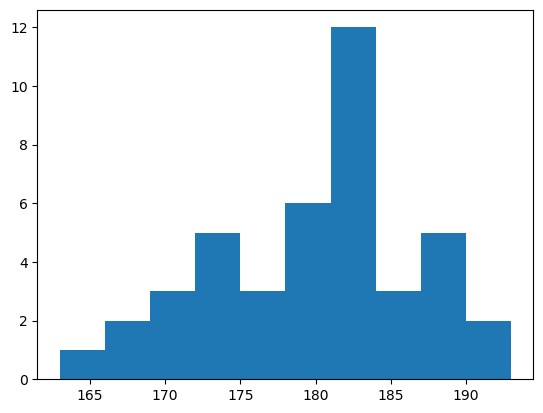

In [217]:
import matplotlib.pyplot as plt
plt.hist(ki)

In [215]:
plt.hist(data['ki'])

NameError: name 'plt' is not defined